In [12]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 20

with open(filename) as data_file:
    data = json.load(data_file)
    d = pd.DataFrame(data)
    df = pd.concat([pd.DataFrame(d[column]['time_list']).T for column in d], axis=1)
    dft = df.loc[['actual_paint_frames',
                'expected_frames', 
                'frame_throughput',
                'long_frame'], :]
    
dft

KeyError: 'file'

In [8]:
#d = pd.DataFrame(pd.Series(df["test_firefox_gdoc_read_frame_throughput_scroll_1"]['time_sequence'])[0])
frame = pd.DataFrame([pd.Series(df[c]['time_sequence']).diff() \
                                                       .apply(lambda x: np.round(x/16.67)) \
                                                       .drop(0) \
                                                       .astype(int) for c in df]).T
frame.columns = ['chrome_FT_scroll_1', 
                 'chrome_FT_scroll_end',
                 'firefox_FT_scroll_1',
                 'firefox_FT_scroll_end']

In [9]:
frame.quantile([0.01, 0.99], interpolation='nearest')

,chrome_FT_scroll_1,chrome_FT_scroll_end,firefox_FT_scroll_1,firefox_FT_scroll_end
0.01,1.0,1.0,1.0,1.0
0.99,1.0,21.0,1.0,2.0


In [10]:
frame.describe()

,chrome_FT_scroll_1,chrome_FT_scroll_end,firefox_FT_scroll_1,firefox_FT_scroll_end
count,1.0,32.000000,23.0,75.000000
mean,1.0,2.625000,1.0,1.373333
std,NaN,3.489616,0.0,0.486947
min,1.0,1.000000,1.0,1.000000
25%,1.0,1.000000,1.0,1.000000
50%,1.0,2.000000,1.0,1.000000
75%,1.0,3.000000,1.0,2.000000
max,1.0,21.000000,1.0,2.000000


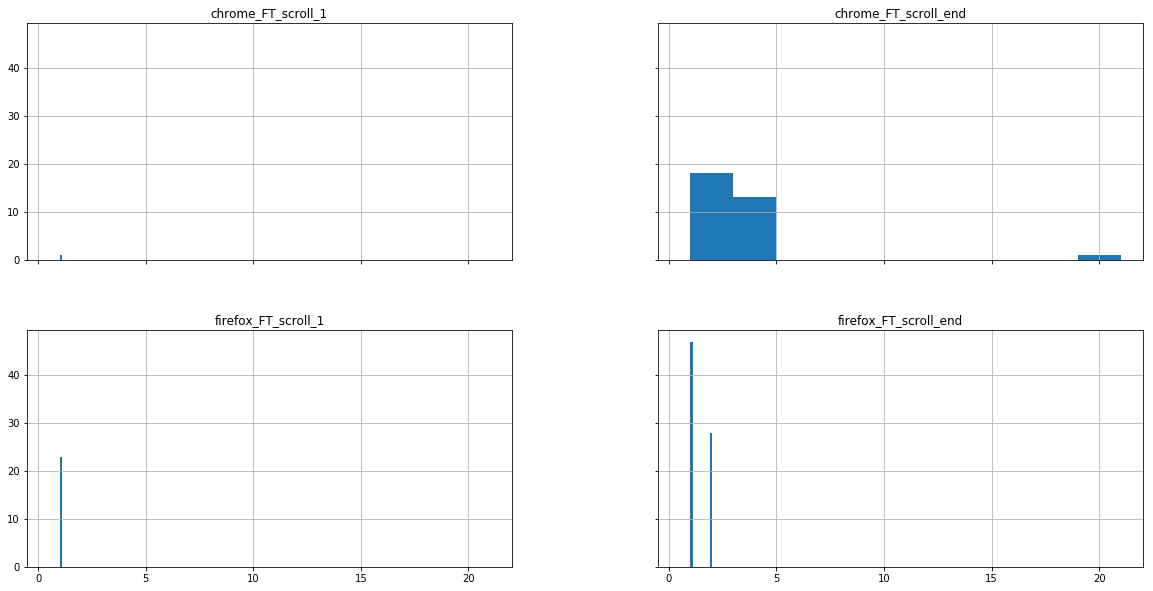

In [11]:
frame.hist(layout=(1,fig_no), sharey=True, sharex=True, figsize=(fig_size,10))
plt.show()